# Table of Contents
 <p><div class="lev1 toc-item"><a href="#New-York-City-Taxi-Trip-Duration" data-toc-modified-id="New-York-City-Taxi-Trip-Duration-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>New York City Taxi Trip Duration</a></div><div class="lev2 toc-item"><a href="#Credit-to:" data-toc-modified-id="Credit-to:-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Credit to:</a></div><div class="lev1 toc-item"><a href="#Load-data" data-toc-modified-id="Load-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load data</a></div><div class="lev3 toc-item"><a href="#Load-another-dataset-with-distance-from-OSMR" data-toc-modified-id="Load-another-dataset-with-distance-from-OSMR-201"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Load another dataset with distance from OSMR</a></div><div class="lev4 toc-item"><a href="#Check-different-between-orginal-train-data-and-OSM-data-set" data-toc-modified-id="Check-different-between-orginal-train-data-and-OSM-data-set-2011"><span class="toc-item-num">2.0.1.1&nbsp;&nbsp;</span>Check different between orginal train data and OSM data set</a></div><div class="lev3 toc-item"><a href="#Combine-train-data-and-eval-data" data-toc-modified-id="Combine-train-data-and-eval-data-202"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Combine train data and eval data</a></div><div class="lev1 toc-item"><a href="#Pre-process-data" data-toc-modified-id="Pre-process-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Pre-process data</a></div><div class="lev2 toc-item"><a href="#Check&amp;-Fill--NaN" data-toc-modified-id="Check&amp;-Fill--NaN-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Check&amp; Fill  NaN</a></div><div class="lev3 toc-item"><a href="#FillNA-for-total_distance" data-toc-modified-id="FillNA-for-total_distance-311"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>FillNA for total_distance</a></div><div class="lev3 toc-item"><a href="#FillNaN-for-number_of_streets" data-toc-modified-id="FillNaN-for-number_of_streets-312"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>FillNaN for number_of_streets</a></div><div class="lev2 toc-item"><a href="#Transform-object-data" data-toc-modified-id="Transform-object-data-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Transform object data</a></div><div class="lev3 toc-item"><a href="#Convert-datetime-string-to-object" data-toc-modified-id="Convert-datetime-string-to-object-321"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Convert datetime string to object</a></div><div class="lev3 toc-item"><a href="#store_and_fwd_flag" data-toc-modified-id="store_and_fwd_flag-322"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>store_and_fwd_flag</a></div><div class="lev3 toc-item"><a href="#start_street" data-toc-modified-id="start_street-323"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>start_street</a></div><div class="lev3 toc-item"><a href="#end_street" data-toc-modified-id="end_street-324"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>end_street</a></div><div class="lev3 toc-item"><a href="#Drop-unused-cols" data-toc-modified-id="Drop-unused-cols-325"><span class="toc-item-num">3.2.5&nbsp;&nbsp;</span>Drop unused cols</a></div><div class="lev1 toc-item"><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Feature Engineering</a></div><div class="lev2 toc-item"><a href="#Turn,-left,-right" data-toc-modified-id="Turn,-left,-right-41"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Turn, left, right</a></div><div class="lev2 toc-item"><a href="#Cluster" data-toc-modified-id="Cluster-42"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Cluster</a></div><div class="lev3 toc-item"><a href="#starting_street_tf" data-toc-modified-id="starting_street_tf-421"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>starting_street_tf</a></div><div class="lev3 toc-item"><a href="#End-street-cluster" data-toc-modified-id="End-street-cluster-422"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>End street cluster</a></div>

# New York City Taxi Trip Duration
- Share code and data to improve ride time predictions
- https://www.kaggle.com/c/nyc-taxi-trip-duration/data
- install: http://jupyter-contrib-nbextensions.readthedocs.io/en/latest/install.html
- install: https://github.com/Jupyter-contrib/jupyter_nbextensions_configurator
- install GDAL: https://sandbox.idre.ucla.edu/sandbox/tutorials/installing-gdal-for-windows
- install osmnx: http://geoffboeing.com/2014/09/using-geopandas-windows/


## Credit to:
- https://www.kaggle.com/ankasor/driving-distance-using-open-street-maps-data/notebook
- https://www.kaggle.com/oscarleo/new-york-city-taxi-with-osrm
- https://www.kaggle.com/gaborfodor/from-eda-to-the-top-lb-0-368/notebook

In [1]:
# data processing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import sqrt
from scipy import stats
from scipy.stats import norm
import math
from math import radians, cos, sin, asin, sqrt
from numpy import sort

# ML
# # Scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.model_selection import cross_val_score, train_test_split, learning_curve, validation_curve, KFold
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
# # XGB
from xgboost.sklearn import XGBRegressor
import xgboost as xgb
from xgboost import plot_importance
# # CatBoost
#from catboost import Pool, CatBoostRegressor, cv, CatboostIpythonWidget
# System
import datetime as dtime
from datetime import datetime
import sys
from inspect import getsourcefile
import os.path
import re
import time

# Other
from geographiclib.geodesic import Geodesic
#import osmnx as ox
#import networkx as nx

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/usr/local/lib/python3.4/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.4/dist-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


# Load data

In [2]:
pd.options.display.float_format = '{:,.4f}'.format
# Input data files are available in the DATA_DIR directory.
DATA_DIR = "data-temp"
# Load data. Download from:https://www.kaggle.com/c/nyc-taxi-trip-duration/data
train_data = pd.read_csv(DATA_DIR + "/train.csv")
eval_data =  pd.read_csv(DATA_DIR + "/test.csv")

In [3]:
print("train size:", train_data.shape, " test size:", eval_data.shape)

train size: (1458644, 11)  test size: (625134, 9)


In [4]:
train_data.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.9822,40.7679,-73.9646,40.7656,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.9804,40.7386,-73.9995,40.7312,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.9790,40.7639,-74.0053,40.7101,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.0100,40.7200,-74.0123,40.7067,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.9731,40.7932,-73.9729,40.7825,N,435


In [5]:
eval_data.head(5)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.9881,40.7320,-73.9902,40.7567,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.9642,40.6800,-73.9598,40.6554,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.9974,40.7376,-73.9862,40.7295,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.9561,40.7719,-73.9864,40.7305,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.9702,40.7615,-73.9615,40.7559,N


In [6]:
diff_cols = np.setdiff1d(train_data.columns.values, eval_data.columns.values)
diff_cols

array(['dropoff_datetime', 'trip_duration'], dtype=object)

### Load another dataset with distance from OSMR

In [7]:
# Download from:
# https://www.kaggle.com/oscarleo/new-york-city-taxi-with-osrm
train_osm = pd.read_csv(DATA_DIR + "/fastest_route_train.csv")
eval_osm = pd.read_csv(DATA_DIR + "/fastest_route_test.csv")

In [8]:
print("train_osm size:", train_osm.shape, " test osm size:", eval_osm.shape)

train_osm size: (1458643, 11)  test osm size: (625134, 11)


In [9]:
train_osm[:5]

,id,starting_street,end_street,total_distance,total_travel_time,number_of_steps,street_for_each_step,distance_per_step,travel_time_per_step,step_maneuvers,step_direction
0,id2085575,Center Boulevard,West 29th Street,"3,588.5000",359.8000,7,Center Boulevard|East 49th Street|2nd Avenue|E...,8.1|383.4|962.5|1423.4|640.1|171.1|0,7|42.2|85.4|118.4|87.7|19.1|0,depart|turn|turn|turn|turn|turn|arrive,left|uturn|left|right|left|right|arrive
1,id0633227,East 42nd Street,East 78th Street,"3,935.6000",358.0000,7,East 42nd Street|3rd Avenue|3rd Avenue|East 57...,435.1|1039.8|165.5|445.1|1695.5|154.5|0,64.1|83.5|14.4|35.9|137.9|22.2|0,depart|turn|fork|turn|turn|turn|arrive,right|left|slight right|right|left|right|arrive
2,id1356036,West 74th Street,Joe DiMaggio Highway,"3,468.3000",228.2000,10,West 74th Street|Amsterdam Avenue|West 79th St...,55.1|410|571.2|326.1|1635.7|24.1|90|187.1|169.1|0,15.3|38|46.7|25.1|70.8|12.3|5.8|7.5|6.7|0,depart|turn|turn|roundabout|merge|turn|turn|ne...,right|left|left|right|slight left|left|left|st...
3,id2360318,East 31st Street,Park Avenue,"2,369.6000",240.0000,5,East 31st Street|Park Avenue South|Park Avenue...,172.6|158|1996.1|42.9|0,25.3|19.8|184.9|10|0,depart|turn|fork|continue|arrive,right|right|slight left|uturn|arrive
4,id1397932,Cleveland Place,East 28th Street,"3,050.7000",415.1000,9,Cleveland Place|Lafayette Street|4th Avenue|Un...,119.1|1129|388.6|251.9|781.6|163.9|78|138.6|0,17.4|144.5|53.5|34.2|112.8|24.4|12.8|15.5|0,depart|new name|new name|new name|new name|tur...,right|slight right|straight|straight|straight|...


In [10]:
eval_osm[:5]

,id,starting_street,end_street,total_distance,total_travel_time,number_of_steps,street_for_each_step,distance_per_step,travel_time_per_step,step_maneuvers,step_direction
0,id3109230,East 29th Street,West Street,"5,225.2000",701.5000,8,East 29th Street|2nd Avenue|East 9th Street|Wa...,184.1|1581.9|314.2|137.4|2393.2|595.6|18.8|0,28|206.5|39.1|24.3|321.2|81|1.4|0,depart|turn|turn|new name|turn|turn|turn|arrive,right|left|right|straight|left|right|left|arrive
1,id2725273,7th Avenue,East 42nd Street,"2,346.9000",250.8000,7,7th Avenue|West 32nd Street|6th Avenue|West 36...,16|275.3|328.4|933.9|478.4|314.9|0,9.3|38.3|47|78.4|40.6|37.2|0,depart|turn|turn|turn|turn|turn|arrive,right|left|left|right|left|right|arrive
2,id1101610,Amsterdam Avenue,West 60th Street,"1,690.2000",183.7000,8,Amsterdam Avenue|West 70th Street|Broadway|Col...,123.2|35.5|501.5|431.4|271.9|78.7|247.9|0,13|7.5|39.9|35.8|43.3|8.5|35.7|0,depart|turn|turn|turn|turn|turn|turn|arrive,left|right|right|slight right|right|right|righ...
3,id0502191,West 75th Street,East 79th Street,"2,414.4000",229.2000,6,West 75th Street|Amsterdam Avenue|West 81st St...,34.6|495.9|545.9|973.4|364.6|0,9|41.6|39.8|108.9|29.9|0,depart|turn|turn|new name|new name|arrive,right|right|right|straight|straight|arrive
4,id0002695,7th Avenue,Park Avenue Tunnel,"2,742.1000",260.8000,6,7th Avenue|West 50th Street|Lexington Avenue|E...,66.8|1050.2|1367.7|151.9|105.5|0,11.7|82.8|137.3|17.3|11.7|0,depart|turn|turn|turn|turn|arrive,left|left|right|right|right|arrive


#### Check different between orginal train data and OSM data set

In [11]:
diff_cols = np.setdiff1d(train_osm.columns.values, train_data.columns.values)
diff_cols

array(['distance_per_step', 'end_street', 'number_of_steps',
       'starting_street', 'step_direction', 'step_maneuvers',
       'street_for_each_step', 'total_distance', 'total_travel_time',
       'travel_time_per_step'], dtype=object)

In [12]:
col_use =col_use = ['id', 'total_distance', 'total_travel_time',
                   'number_of_steps',
                   'starting_street', 'end_street']
train_osm_data = train_osm[col_use]
train_osm_data[:5]

,id,total_distance,total_travel_time,number_of_steps,starting_street,end_street
0,id2085575,"3,588.5000",359.8000,7,Center Boulevard,West 29th Street
1,id0633227,"3,935.6000",358.0000,7,East 42nd Street,East 78th Street
2,id1356036,"3,468.3000",228.2000,10,West 74th Street,Joe DiMaggio Highway
3,id2360318,"2,369.6000",240.0000,5,East 31st Street,Park Avenue
4,id1397932,"3,050.7000",415.1000,9,Cleveland Place,East 28th Street


In [13]:
eval_osm_data = eval_osm[col_use]
eval_osm_data[:5] 

,id,total_distance,total_travel_time,number_of_steps,starting_street,end_street
0,id3109230,"5,225.2000",701.5000,8,East 29th Street,West Street
1,id2725273,"2,346.9000",250.8000,7,7th Avenue,East 42nd Street
2,id1101610,"1,690.2000",183.7000,8,Amsterdam Avenue,West 60th Street
3,id0502191,"2,414.4000",229.2000,6,West 75th Street,East 79th Street
4,id0002695,"2,742.1000",260.8000,6,7th Avenue,Park Avenue Tunnel


In [14]:
del train_osm

In [15]:
del eval_osm

### Combine train data and eval data

In [16]:
train_data = train_osm_data.join(train_data.set_index('id'), on='id')
train_data[:5]

,id,total_distance,total_travel_time,number_of_steps,starting_street,end_street,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2085575,"3,588.5000",359.8000,7,Center Boulevard,West 29th Street,2,2016-03-18 13:47:52,2016-03-18 14:25:40,5,-73.9653,40.7526,-73.9947,40.7486,N,2268
1,id0633227,"3,935.6000",358.0000,7,East 42nd Street,East 78th Street,1,2016-03-01 19:24:44,2016-03-01 19:40:36,1,-73.9790,40.7526,-73.9516,40.7709,N,952
2,id1356036,"3,468.3000",228.2000,10,West 74th Street,Joe DiMaggio Highway,2,2016-05-20 22:49:05,2016-05-20 22:54:43,1,-73.9813,40.7801,-73.9920,40.7743,N,338
3,id2360318,"2,369.6000",240.0000,5,East 31st Street,Park Avenue,2,2016-05-23 09:55:24,2016-05-23 10:05:50,1,-73.9808,40.7445,-73.9710,40.7615,N,626
4,id1397932,"3,050.7000",415.1000,9,Cleveland Place,East 28th Street,1,2016-06-02 20:01:15,2016-06-02 20:16:00,1,-73.9974,40.7212,-73.9843,40.7434,N,885


In [17]:
eval_data = eval_osm_data.join(eval_data.set_index('id'), on='id')
eval_data[:5]

,id,total_distance,total_travel_time,number_of_steps,starting_street,end_street,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3109230,"5,225.2000",701.5000,8,East 29th Street,West Street,1,2016-02-12 07:59:49,1,-73.9762,40.7409,-74.0137,40.7151,N
1,id2725273,"2,346.9000",250.8000,7,7th Avenue,East 42nd Street,2,2016-01-01 16:11:51,1,-73.9919,40.7500,-73.9711,40.7495,N
2,id1101610,"1,690.2000",183.7000,8,Amsterdam Avenue,West 60th Street,1,2016-05-18 07:53:45,1,-73.9835,40.7764,-73.9845,40.7701,N
3,id0502191,"2,414.4000",229.2000,6,West 75th Street,East 79th Street,1,2016-05-04 11:51:02,1,-73.9798,40.7805,-73.9599,40.7755,N
4,id0002695,"2,742.1000",260.8000,6,7th Avenue,Park Avenue Tunnel,1,2016-01-13 21:16:48,1,-73.9828,40.7616,-73.9812,40.7472,N


In [18]:
del train_osm_data
del eval_osm_data

In [19]:
label = 'trip_duration'
features = eval_data.columns.values
target = train_data[label]
combine_data = pd.concat([train_data[features], eval_data], keys=['train','eval'])
print("combine data:", len(combine_data))
combine_data.head(5)

combine data: 2083777


id  total_distance  total_travel_time  number_of_steps  \
train 0  id2085575      3,588.5000           359.8000                7   
      1  id0633227      3,935.6000           358.0000                7   
      2  id1356036      3,468.3000           228.2000               10   
      3  id2360318      2,369.6000           240.0000                5   
      4  id1397932      3,050.7000           415.1000                9   

          starting_street            end_street  vendor_id  \
train 0  Center Boulevard      West 29th Street          2   
      1  East 42nd Street      East 78th Street          1   
      2  West 74th Street  Joe DiMaggio Highway          2   
      3  East 31st Street           Park Avenue          2   
      4   Cleveland Place      East 28th Street          1   

             pickup_datetime  passenger_count  pickup_longitude  \
train 0  2016-03-18 13:47:52                5          -73.9653   
      1  2016-03-01 19:24:44                1          -73.9790   
      2  2016-05-20 22:49:05                1          -73.9813   
      3  2016-05-23 09:55:24                1          -73.9808   
      4  2016-06-02 20:01:15                1          -73.9974   

         pickup_latitude  dropoff_longitude  dropoff_latitude  \
train 0          40.7526           -73.9947           40.7486   
      1          40.7526           -73.9516           40.7709   
      2          40.7801           -73.9920           40.7743   
      3          40.7445           -73.9710           40.7615   
      4          40.7212           -73.9843           40.7434   

        store_and_fwd_flag  
train 0                  N  
      1                  N  
      2                  N  
      3                  N  
      4                  N

# Pre-process data

## Check& Fill  NaN 

In [20]:
def check_null_data(data):
    #Get high percent of NaN data
    null_data = data.isnull()
    total = null_data.sum().sort_values(ascending=False)
    percent = (null_data.sum()/null_data.count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    high_percent_miss_data = missing_data[missing_data['Percent']>0]
    #print(missing_data)
    print(high_percent_miss_data)
    miss_data_cols = high_percent_miss_data.index.values
    return miss_data_cols

In [21]:
# combine data for null
check_null_data(combine_data)

Empty DataFrame
Columns: [Total, Percent]
Index: []


array([], dtype=object)

In [22]:
combine_data.dtypes

id                     object
total_distance        float64
total_travel_time     float64
number_of_steps         int64
starting_street        object
end_street             object
vendor_id               int64
pickup_datetime        object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
dtype: object

### FillNA for total_distance

In [23]:
combine_data['total_distance'].fillna(0, inplace=True)

### FillNaN for number_of_streets

In [24]:
combine_data['number_of_steps'].fillna(1, inplace=True)

## Transform object data

In [25]:
data = combine_data

### Convert datetime string to object

In [26]:
def pd_datetime(data):
    date_format = "%Y-%m-%d %H:%M:%S"
    datetime_obj = data['pickup_datetime'].apply(lambda x: datetime.strptime(x, date_format))
    return datetime_obj 

In [27]:
#data['datetime_obj'] = pd_datetime(data)
data['datetime_obj'] = pd.to_datetime(data['pickup_datetime'])
data['datetime_obj'][:5]

train  0   2016-03-18 13:47:52
       1   2016-03-01 19:24:44
       2   2016-05-20 22:49:05
       3   2016-05-23 09:55:24
       4   2016-06-02 20:01:15
Name: datetime_obj, dtype: datetime64[ns]

In [28]:
data['pickup_year'] = data['datetime_obj'].dt.year
data['pickup_month'] = data['datetime_obj'].dt.month
data['pickup_weekday'] = data['datetime_obj'].dt.weekday
data['pickup_day'] = data['datetime_obj'].dt.day
data['pickup_hour'] = data['datetime_obj'].dt.hour
data['pickup_whour'] = data['pickup_weekday'] * 24 + data['pickup_hour']
data['pickup_minute'] = data['datetime_obj'].dt.minute

In [29]:
data[:5]

id  total_distance  total_travel_time  number_of_steps  \
train 0  id2085575      3,588.5000           359.8000                7   
      1  id0633227      3,935.6000           358.0000                7   
      2  id1356036      3,468.3000           228.2000               10   
      3  id2360318      2,369.6000           240.0000                5   
      4  id1397932      3,050.7000           415.1000                9   

          starting_street            end_street  vendor_id  \
train 0  Center Boulevard      West 29th Street          2   
      1  East 42nd Street      East 78th Street          1   
      2  West 74th Street  Joe DiMaggio Highway          2   
      3  East 31st Street           Park Avenue          2   
      4   Cleveland Place      East 28th Street          1   

             pickup_datetime  passenger_count  pickup_longitude  \
train 0  2016-03-18 13:47:52                5          -73.9653   
      1  2016-03-01 19:24:44                1          -73.9790   
      2  2016-05-20 22:49:05                1          -73.9813   
      3  2016-05-23 09:55:24                1          -73.9808   
      4  2016-06-02 20:01:15                1          -73.9974   

             ...        dropoff_latitude  store_and_fwd_flag  \
train 0      ...                 40.7486                   N   
      1      ...                 40.7709                   N   
      2      ...                 40.7743                   N   
      3      ...                 40.7615                   N   
      4      ...                 40.7434                   N   

               datetime_obj pickup_year pickup_month  pickup_weekday  \
train 0 2016-03-18 13:47:52        2016            3               4   
      1 2016-03-01 19:24:44        2016            3               1   
      2 2016-05-20 22:49:05        2016            5               4   
      3 2016-05-23 09:55:24        2016            5               0   
      4 2016-06-02 20:01:15        2016            6               3   

         pickup_day  pickup_hour  pickup_whour  pickup_minute  
train 0          18           13           109             47  
      1           1           19            43             24  
      2          20           22           118             49  
      3          23            9             9             55  
      4           2           20            92              1  

[5 rows x 22 columns]

In [30]:
data['pickup_month'].value_counts()

3    365886
4    359077
5    356057
2    340614
6    334760
1    327383
Name: pickup_month, dtype: int64

### store_and_fwd_flag

In [31]:
col = 'store_and_fwd_flag'
data[col].value_counts()

N    2072302
Y      11475
Name: store_and_fwd_flag, dtype: int64

In [32]:
data_dict = {'Y':1, 'N':0}
data_tf = data[col].map(data_dict)
data[col].update(data_tf)
data[:5]

id  total_distance  total_travel_time  number_of_steps  \
train 0  id2085575      3,588.5000           359.8000                7   
      1  id0633227      3,935.6000           358.0000                7   
      2  id1356036      3,468.3000           228.2000               10   
      3  id2360318      2,369.6000           240.0000                5   
      4  id1397932      3,050.7000           415.1000                9   

          starting_street            end_street  vendor_id  \
train 0  Center Boulevard      West 29th Street          2   
      1  East 42nd Street      East 78th Street          1   
      2  West 74th Street  Joe DiMaggio Highway          2   
      3  East 31st Street           Park Avenue          2   
      4   Cleveland Place      East 28th Street          1   

             pickup_datetime  passenger_count  pickup_longitude  \
train 0  2016-03-18 13:47:52                5          -73.9653   
      1  2016-03-01 19:24:44                1          -73.9790   
      2  2016-05-20 22:49:05                1          -73.9813   
      3  2016-05-23 09:55:24                1          -73.9808   
      4  2016-06-02 20:01:15                1          -73.9974   

             ...        dropoff_latitude  store_and_fwd_flag  \
train 0      ...                 40.7486                   0   
      1      ...                 40.7709                   0   
      2      ...                 40.7743                   0   
      3      ...                 40.7615                   0   
      4      ...                 40.7434                   0   

               datetime_obj pickup_year pickup_month  pickup_weekday  \
train 0 2016-03-18 13:47:52        2016            3               4   
      1 2016-03-01 19:24:44        2016            3               1   
      2 2016-05-20 22:49:05        2016            5               4   
      3 2016-05-23 09:55:24        2016            5               0   
      4 2016-06-02 20:01:15        2016            6               3   

         pickup_day  pickup_hour  pickup_whour  pickup_minute  
train 0          18           13           109             47  
      1           1           19            43             24  
      2          20           22           118             49  
      3          23            9             9             55  
      4           2           20            92              1  

[5 rows x 22 columns]

### start_street

In [33]:
col = 'starting_street'
data_not_null = data[data[col].notnull()]
print(len(data_not_null))
data_not_null[:5]

2083777


id  total_distance  total_travel_time  number_of_steps  \
train 0  id2085575      3,588.5000           359.8000                7   
      1  id0633227      3,935.6000           358.0000                7   
      2  id1356036      3,468.3000           228.2000               10   
      3  id2360318      2,369.6000           240.0000                5   
      4  id1397932      3,050.7000           415.1000                9   

          starting_street            end_street  vendor_id  \
train 0  Center Boulevard      West 29th Street          2   
      1  East 42nd Street      East 78th Street          1   
      2  West 74th Street  Joe DiMaggio Highway          2   
      3  East 31st Street           Park Avenue          2   
      4   Cleveland Place      East 28th Street          1   

             pickup_datetime  passenger_count  pickup_longitude  \
train 0  2016-03-18 13:47:52                5          -73.9653   
      1  2016-03-01 19:24:44                1          -73.9790   
      2  2016-05-20 22:49:05                1          -73.9813   
      3  2016-05-23 09:55:24                1          -73.9808   
      4  2016-06-02 20:01:15                1          -73.9974   

             ...        dropoff_latitude  store_and_fwd_flag  \
train 0      ...                 40.7486                   0   
      1      ...                 40.7709                   0   
      2      ...                 40.7743                   0   
      3      ...                 40.7615                   0   
      4      ...                 40.7434                   0   

               datetime_obj pickup_year pickup_month  pickup_weekday  \
train 0 2016-03-18 13:47:52        2016            3               4   
      1 2016-03-01 19:24:44        2016            3               1   
      2 2016-05-20 22:49:05        2016            5               4   
      3 2016-05-23 09:55:24        2016            5               0   
      4 2016-06-02 20:01:15        2016            6               3   

         pickup_day  pickup_hour  pickup_whour  pickup_minute  
train 0          18           13           109             47  
      1           1           19            43             24  
      2          20           22           118             49  
      3          23            9             9             55  
      4           2           20            92              1  

[5 rows x 22 columns]

In [34]:
le = LabelEncoder()
data_tf = le.fit_transform(data_not_null[col])
data_tf[:5]

array([ 710, 1068, 2753, 1056,  771])

In [35]:
col_tf = col + '_tf'
data_not_null.loc[:,col_tf] = data_tf

In [36]:
data[col_tf] = data_not_null[col_tf]

In [37]:
data[data[col].isnull()][:5]

,,id,total_distance,total_travel_time,number_of_steps,starting_street,end_street,vendor_id,pickup_datetime,passenger_count,pickup_longitude,...,store_and_fwd_flag,datetime_obj,pickup_year,pickup_month,pickup_weekday,pickup_day,pickup_hour,pickup_whour,pickup_minute,starting_street_tf


### end_street

In [38]:
col = 'end_street'
data_not_null = data[data[col].notnull()]
print(len(data_not_null))
data_not_null[:5]

2083777


id  total_distance  total_travel_time  number_of_steps  \
train 0  id2085575      3,588.5000           359.8000                7   
      1  id0633227      3,935.6000           358.0000                7   
      2  id1356036      3,468.3000           228.2000               10   
      3  id2360318      2,369.6000           240.0000                5   
      4  id1397932      3,050.7000           415.1000                9   

          starting_street            end_street  vendor_id  \
train 0  Center Boulevard      West 29th Street          2   
      1  East 42nd Street      East 78th Street          1   
      2  West 74th Street  Joe DiMaggio Highway          2   
      3  East 31st Street           Park Avenue          2   
      4   Cleveland Place      East 28th Street          1   

             pickup_datetime  passenger_count  pickup_longitude  \
train 0  2016-03-18 13:47:52                5          -73.9653   
      1  2016-03-01 19:24:44                1          -73.9790   
      2  2016-05-20 22:49:05                1          -73.9813   
      3  2016-05-23 09:55:24                1          -73.9808   
      4  2016-06-02 20:01:15                1          -73.9974   

                ...          store_and_fwd_flag        datetime_obj  \
train 0         ...                           0 2016-03-18 13:47:52   
      1         ...                           0 2016-03-01 19:24:44   
      2         ...                           0 2016-05-20 22:49:05   
      3         ...                           0 2016-05-23 09:55:24   
      4         ...                           0 2016-06-02 20:01:15   

         pickup_year pickup_month pickup_weekday  pickup_day  pickup_hour  \
train 0         2016            3              4          18           13   
      1         2016            3              1           1           19   
      2         2016            5              4          20           22   
      3         2016            5              0          23            9   
      4         2016            6              3           2           20   

         pickup_whour  pickup_minute  starting_street_tf  
train 0           109             47                 710  
      1            43             24                1068  
      2           118             49                2753  
      3             9             55                1056  
      4            92              1                 771  

[5 rows x 23 columns]

In [39]:
le = LabelEncoder()
data_tf = le.fit_transform(data_not_null[col])
data_tf[:5]

array([5848, 2284, 3299, 4330, 2227])

In [40]:
col_tf = col + '_tf'
data_not_null.loc[:,col_tf] = data_tf

In [41]:
data[col_tf] = data_not_null[col_tf]

In [42]:
data[data[col].isnull()][:5]

,,id,total_distance,total_travel_time,number_of_steps,starting_street,end_street,vendor_id,pickup_datetime,passenger_count,pickup_longitude,...,datetime_obj,pickup_year,pickup_month,pickup_weekday,pickup_day,pickup_hour,pickup_whour,pickup_minute,starting_street_tf,end_street_tf


### Drop unused cols

In [43]:
# Drop pickup_datetime
data.drop('pickup_datetime', axis=1, inplace=True)
data.drop('datetime_obj', axis=1, inplace=True)
data.drop('starting_street', axis=1, inplace=True)
data.drop('end_street', axis=1, inplace=True)

In [44]:
combine_data = data

# Feature Engineering

## Turn, left, right

In [45]:
data = combine_data

In [46]:
data.columns

Index(['id', 'total_distance', 'total_travel_time', 'number_of_steps',
       'vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'pickup_year', 'pickup_month', 'pickup_weekday', 'pickup_day',
       'pickup_hour', 'pickup_whour', 'pickup_minute', 'starting_street_tf',
       'end_street_tf'],
      dtype='object')

In [47]:
data2 = data['step_maneuvers'][:5]
data2

KeyError: 'step_maneuvers'

In [ ]:
turns = data2.apply(lambda x: x.count('turn'))
turns

In [ ]:
data2 = data['step_direction'][:5]
data2

## Cluster

### starting_street_tf

In [59]:
col_use =['starting_street_tf']
data = combine_data[col_use]

In [60]:
data[:5]

starting_street_tf
train 0                 710
      1                1068
      2                2753
      3                1056
      4                 771

In [61]:
batch_size = 10000
mbk = MiniBatchKMeans(init='k-means++', n_clusters=100, batch_size=batch_size,
                      n_init=10, max_no_improvement=10, verbose=0)
mbk.fit(data)

MiniBatchKMeans(batch_size=10000, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10,
        n_clusters=100, n_init=10, random_state=None,
        reassignment_ratio=0.01, tol=0.0, verbose=0)

In [62]:
# mbk_means_cluster_centers = np.sort(mbk.cluster_centers_, axis=0)
# mbk_means_labels = pairwise_distances_argmin(data, mbk_means_cluster_centers)
mbk_means_labels = mbk.predict(data)
print("Cluster size:", len(mbk_means_labels))
mbk_means_labels[:5]

Cluster size: 2083777


array([ 6, 75, 43,  2, 82], dtype=int32)

In [63]:
data = combine_data.copy()
data.loc[:, 'pickup_whour_st_cluster'] = mbk_means_labels
data[:5]

id  total_distance  total_travel_time  number_of_steps  \
train 0  id2085575      3,588.5000           359.8000                7   
      1  id0633227      3,935.6000           358.0000                7   
      2  id1356036      3,468.3000           228.2000               10   
      3  id2360318      2,369.6000           240.0000                5   
      4  id1397932      3,050.7000           415.1000                9   

         vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
train 0          2                5          -73.9653          40.7526   
      1          1                1          -73.9790          40.7526   
      2          2                1          -73.9813          40.7801   
      3          2                1          -73.9808          40.7445   
      4          1                1          -73.9974          40.7212   

         dropoff_longitude  dropoff_latitude           ...             \
train 0           -73.9947           40.7486           ...              
      1           -73.9516           40.7709           ...              
      2           -73.9920           40.7743           ...              
      3           -73.9710           40.7615           ...              
      4           -73.9843           40.7434           ...              

        pickup_year  pickup_month  pickup_weekday  pickup_day  pickup_hour  \
train 0        2016             3               4          18           13   
      1        2016             3               1           1           19   
      2        2016             5               4          20           22   
      3        2016             5               0          23            9   
      4        2016             6               3           2           20   

         pickup_whour  pickup_minute  starting_street_tf  end_street_tf  \
train 0           109             47                 710           5848   
      1            43             24                1068           2284   
      2           118             49                2753           3299   
      3             9             55                1056           4330   
      4            92              1                 771           2227   

         pickup_whour_st_cluster  
train 0                        6  
      1                       75  
      2                       43  
      3                        2  
      4                       82  

[5 rows x 21 columns]

In [54]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

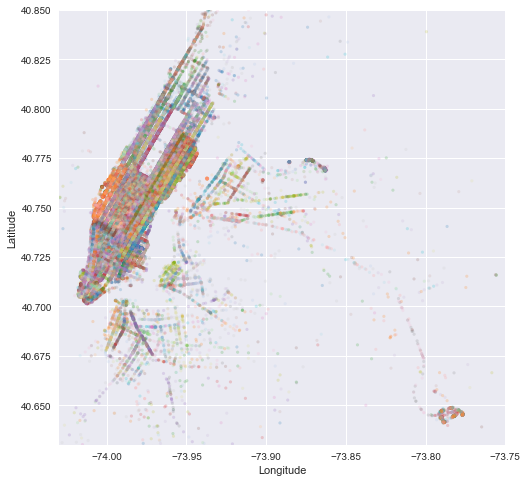

In [58]:
data2 = data[:200000]
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(8,8))
ax.scatter(data2['pickup_longitude'], data2['pickup_latitude'] , c=data2['pickup_whour_st_cluster'], cmap='tab20',s=10, lw=0, alpha=0.2)
ax.set_xlim(city_long_border)
ax.set_ylim(city_lat_border)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

### End street cluster

In [ ]:
col_use =['pickup_hour', 'end_street_tf']
data = combine_data[col_use]

In [ ]:
data[:5]

In [ ]:
batch_size = 10000
mbk = MiniBatchKMeans(init='k-means++', n_clusters=100, batch_size=batch_size,
                      n_init=10, max_no_improvement=10, verbose=0)
mbk.fit(data)

In [ ]:
# mbk_means_cluster_centers = np.sort(mbk.cluster_centers_, axis=0)
# mbk_means_labels = pairwise_distances_argmin(data, mbk_means_cluster_centers)
mbk_means_labels = mbk.predict(data)
print("Cluster size:", len(mbk_means_labels))
mbk_means_labels[:5]

In [ ]:
combine_data.loc[:, 'pickup_hour_et_cluster'] = mbk_means_labels
combine_data[:5]

In [ ]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

In [ ]:
data2 = combine_data[:200000]
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(8,8))
ax.scatter(data2['dropoff_longitude'], data2['dropoff_latitude'] , c=data2['pickup_hour_et_cluster'], cmap='tab20',s=10, lw=0, alpha=0.2)
ax.set_xlim(city_long_border)
ax.set_ylim(city_lat_border)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()